In [1]:
import numpy as np
import pandas as pd

gbdf = pd.read_csv('data\gbenchml_iphone_15_pro.csv')
gbdf.columns

Index(['Benchmark ID', 'Device', 'System', 'Memory', 'Inference Framework',
       'TC SP', 'TC HP', 'TC Q', 'MT SP', 'MT HP', 'MT Q', 'Link'],
      dtype='object')

In [2]:
cols = ['TC SP', 'TC HP', 'TC Q', 'MT SP', 'MT HP', 'MT Q']
ip_data = gbdf[cols]
ip_data.describe()

,TC SP,TC HP,TC Q,MT SP,MT HP,MT Q
count,20.000000,20.000000,20.000000,20.000000,20.00000,20.000000
mean,3196.150000,3038.500000,2880.600000,3132.950000,6226.15000,7353.650000
std,32.345625,305.310627,466.533735,46.913667,205.04769,275.962102
min,3119.000000,2099.000000,1803.000000,2989.000000,5796.00000,6587.000000
25%,3186.750000,2966.000000,2807.250000,3116.500000,6144.00000,7294.000000
50%,3196.500000,3027.000000,3026.000000,3135.000000,6203.00000,7361.000000
75%,3208.750000,3220.750000,3156.250000,3145.000000,6295.00000,7517.000000
max,3256.000000,3476.000000,3479.000000,3238.000000,6727.00000,7849.000000


In [3]:
lt_data = pd.read_csv('data\gbenchml_4060_laptop.csv')[cols]
lt_data.describe()

,TC SP,TC HP,TC Q,MT SP,MT HP,MT Q
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,2939.500000,3446.000000,1830.450000,3405.650000,3607.950000,1483.150000
std,51.317895,71.488681,28.199431,48.700238,189.028952,18.146408
min,2801.000000,3214.000000,1741.000000,3293.000000,2895.000000,1442.000000
25%,2913.500000,3431.000000,1824.250000,3381.750000,3601.750000,1476.500000
50%,2943.000000,3448.500000,1833.000000,3409.000000,3627.500000,1482.500000
75%,2970.250000,3468.250000,1842.500000,3428.000000,3685.250000,1500.000000
max,3043.000000,3571.000000,1866.000000,3491.000000,3876.000000,1513.000000


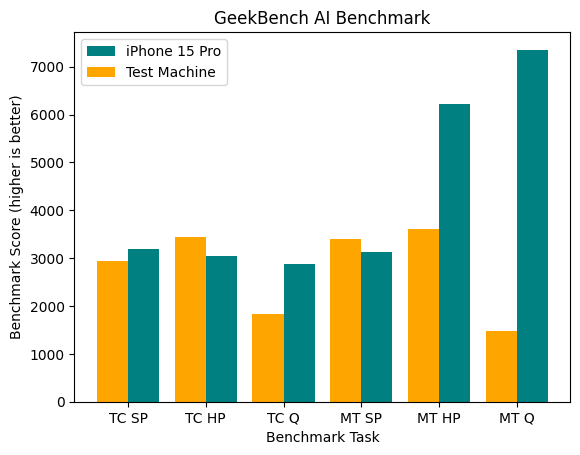

In [4]:
import matplotlib.pyplot as plt

axis = np.arange(1, 7)
width = 0.2

plt.bar(axis+width, ip_data.mean(), width*2, label='iPhone 15 Pro', color='teal')
plt.bar(axis-width, lt_data.mean(), width*2, label='Test Machine', color='orange')
plt.xticks(axis, cols)
plt.title('GeekBench AI Benchmark')
plt.ylabel('Benchmark Score (higher is better)')
plt.xlabel('Benchmark Task')
plt.legend()
plt.show()

https://www.geekbench.com/doc/geekbench-ai-workloads.pdf

- Text Classification on BERT-tiny (4.4M parameters)
- Machine Translation on Transformer (65M parameters)  
  
- Single precision (32-bit float)
- Half precision (16-bit float)
- Quantized (8-bit integer)

In [5]:
inf = pd.read_csv('data/inference.csv')
inf.columns

Index(['id', 'type', 'prompt', 'choices', 'reply', 'rating', 'time', 'model',
       'precision'],
      dtype='object')

In [6]:
print(np.unique(inf['model']))
print(np.unique(inf['precision']))

['phi-3.5-mini-instruct' 'smollm2-1.7b-instruct']
[ 8 16]


In [7]:
large8 = inf.loc[(inf['model'] == 'phi-3.5-mini-instruct') & (inf['precision'] == 8)]
large16 = inf.loc[(inf['model'] == 'phi-3.5-mini-instruct') & (inf['precision'] == 16)]
small8 = inf.loc[(inf['model'] == 'smollm2-1.7b-instruct') & (inf['precision'] == 8)]
small16 = inf.loc[(inf['model'] == 'smollm2-1.7b-instruct') & (inf['precision'] == 16)]

labels = ['phi-3.5 16bit', 'phi-3.5 8bit', 'smollm2 16bit', 'smollm2 8bit']
models = [large16, large8, small16, small8]

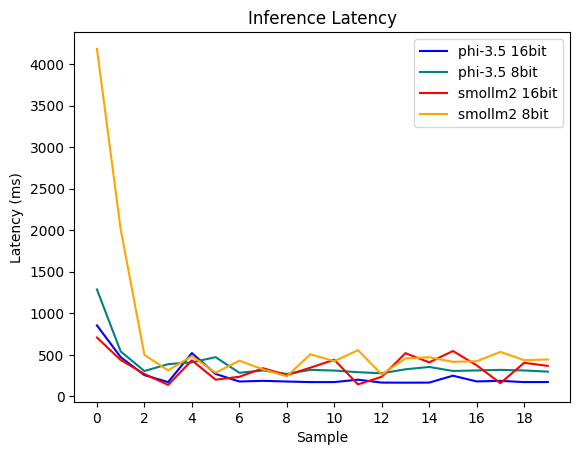

In [8]:
for d, c, l in zip(models, ['blue', 'teal', 'red', 'orange'], labels):
    plt.plot(d['id'], d['time'], color=c, label=l)
plt.title('Inference Latency')
plt.xlabel('Sample')
plt.xticks(range(0, 20, 2))
plt.ylabel('Latency (ms)')
plt.legend()
plt.show()

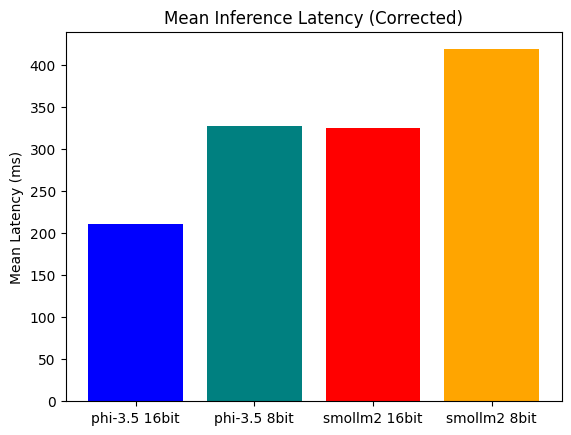

In [9]:
for i, d, c in zip(range(4), models, ['blue', 'teal', 'red', 'orange']):
    plt.bar(i, d['time'][2:].mean(), color=c)

plt.title('Mean Inference Latency (Corrected)')
plt.ylabel('Mean Latency (ms)')
plt.xticks(range(4), labels=labels)
plt.show()

In [10]:
x = ((large8['time'][2:].mean() / large16['time'][2:].mean())-1)*100
print(f'{x:.2f}% increase')

55.46% increase


In [11]:
x = ((small8['time'][2:].mean() / small16['time'][2:].mean())-1)*100
print(f'{x:.2f}% increase')

28.91% increase


In [12]:
for m, d in zip(labels, models):
    score = d['rating'].mean()
    print(f'{m}: {(score)*100:.0f}% accuracy')

phi-3.5 16bit: 100% accuracy
phi-3.5 8bit: 100% accuracy
smollm2 16bit: 75% accuracy
smollm2 8bit: 75% accuracy
